### Check Conversion

In this Notebook we will do a basic data quality check of the conversion, we will also see the immense difference in speed and data accessibility between geodatabases(standard geospatial datastructures)

The ability to subset specifically what we are looking for, and where we are looking for it without having to download a whole zip file and then open a larger vector dataset.

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np
import random
import fiona
from shapely.geometry import box, Point
import xarray as xr

In [3]:
vector_file ='../data/extracted_files_spat/EMODnet_HA_Energy_WindFarms_20240508.gdb'

layer = 1

zarr_file = '../data/converted_zarr_files_spat/geodatabase_to_zarr_finalzarr/EMODnet_HA_Energy_WindFarms_pg_20240508_EMODnet_HA_Energy_WindFarms_20240508.zarr'

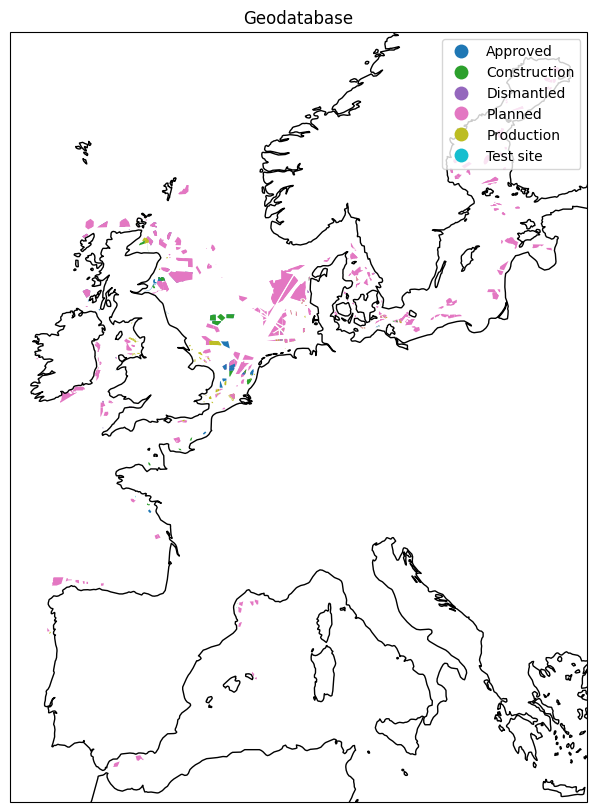

In [4]:

import geopandas as gpd

layers = fiona.listlayers(vector_file)
layer = layers[1]

gdf = gpd.read_file(vector_file, layer=layer)


gdf_filtered = gdf.cx[-10:80, -10:80]


# Plot the geodatabase data
fig, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
gdf_filtered.plot(column='STATUS', ax=ax, legend=True, transform=ccrs.PlateCarree())
ax.set_title('Geodatabase')

plt.show()

/home/onyxia/work/converting_to_zarr/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


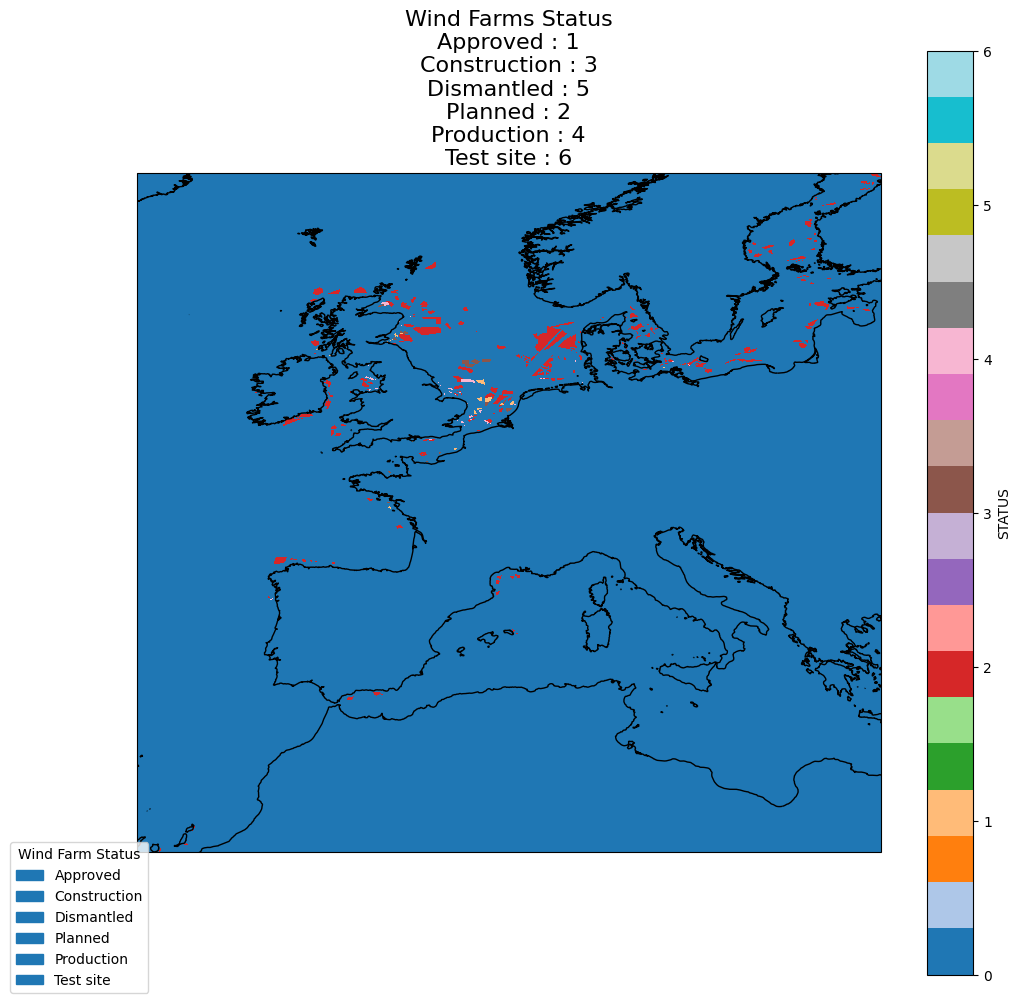

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Open the dataset
ds_gdb2zarr = xr.open_dataset(zarr_file, engine='zarr')

# Define a diverse color palette
# Option 1: Using Matplotlib's 'tab20' colormap
cmap = plt.get_cmap('tab20', len(ds_gdb2zarr['STATUS'].values))

# Option 2: Using Seaborn's 'Set3' palette
# Uncomment the following lines if you prefer Seaborn
# import seaborn as sns
# sns_palette = sns.color_palette('Set3', n_colors=len(ds_gdb2zarr['STATUS'].values))
# cmap = ListedColormap(sns_palette)

# Create the plot
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', linewidth=1)

# Plot the 'STATUS' data with the chosen colormap
dsplot = ds_gdb2zarr['STATUS'].plot(
    ax=ax,
    cmap=cmap,
    add_colorbar=True,  # We'll create a custom legend
    transform=ccrs.PlateCarree()
)

# Create a custom legend
attrs = ds_gdb2zarr['STATUS'].attrs['categorical_encoding']
handles = []
for key, value in attrs.items():
    handles.append(mpatches.Patch(color=cmap(value), label=key))

plt.legend(
    handles=handles,
    title='Wind Farm Status',
    loc='upper right',
    bbox_to_anchor=(0.025, 0.025),
    frameon=True
)

# Set the title with attributes
attrs_str = '\n'.join([f'{key} : {value}' for key, value in attrs.items()])
ax.set_title(f'Wind Farms Status\n{attrs_str}', fontsize=16)

plt.show()

In [ ]:
ds_gdb2zarr = xr.open_dataset(zarr_file, engine='zarr')
# Plot the wind farms
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
dsplot = ds_gdb2zarr['COUNTRY'].plot()

plt.show()

/home/onyxia/work/converting_to_zarr/.venv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver OpenFileGDB does not support open option DRIVER
  return ogr_read(
/home/onyxia/work/converting_to_zarr/.venv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


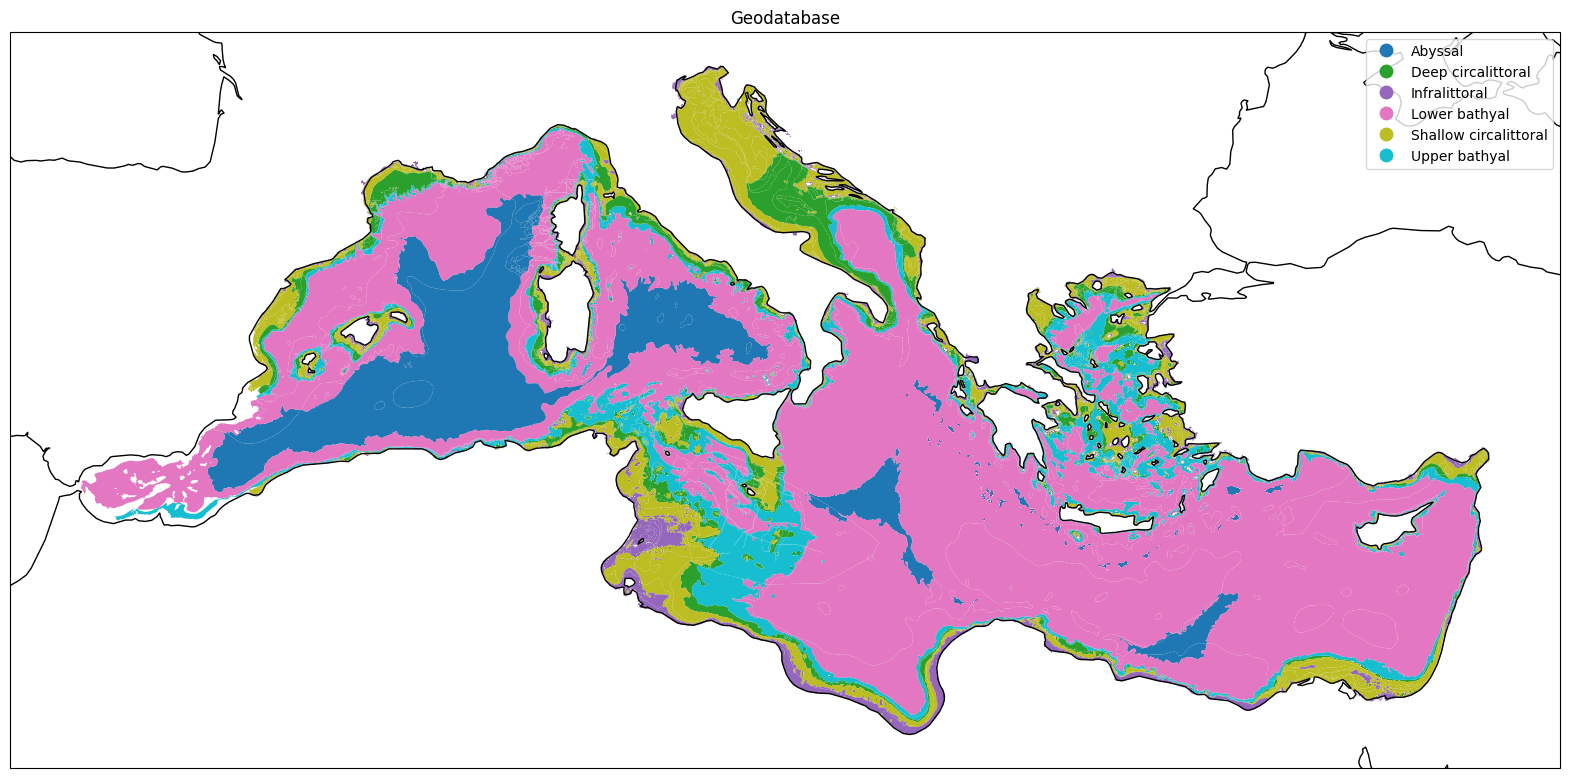

In [2]:
gdb = '../data/extracted_files_spat/EUSeaMap_2023_MediterraneanSea.gdb'
layers= fiona.listlayers(gdb)
layer = layers[0]
layers = fiona.listlayers(gdb)
layer = layers[0]
gdf = gpd.read_file(gdb, driver='FileGDB', layer=layer)

# get geometries in between 20 and 50 latitude and 10 and 40 longitude
gdf_filtered = gdf.cx[0:40, 20:50]
# Plot the geodatabase data
fig, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
gdf_filtered.plot(column='Biozone', ax=ax, legend=True)
ax.set_title('Geodatabase')

plt.show()

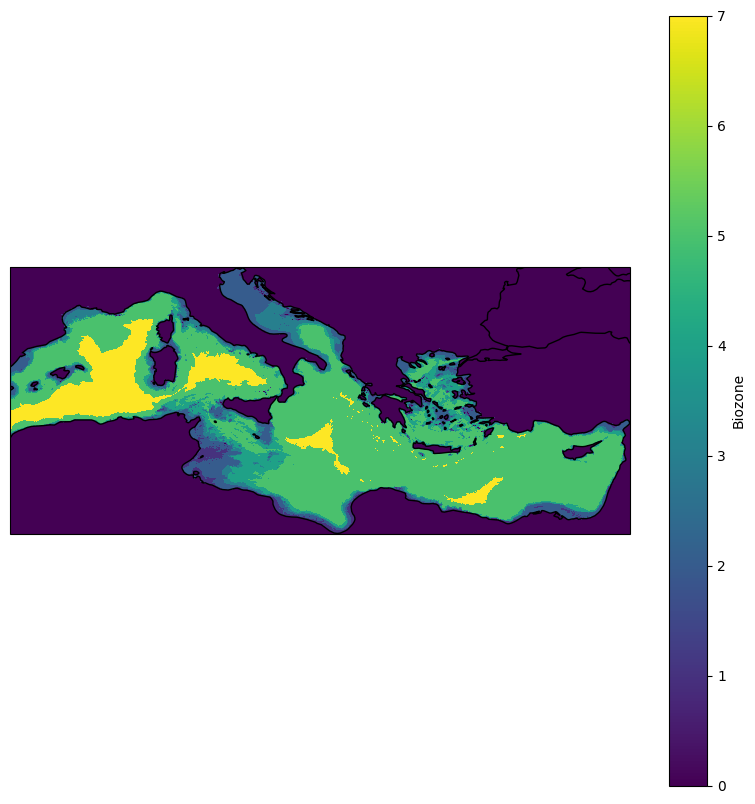

: 

In [9]:
#ds = xr.open_dataset('../data/converted_zarr_files_spat/geodatabase_to_zarr_finalzarr/EUSeaMap_2023_MediterraneanSea_EUSeaMap_2023_MediterraneanSea.zarr')
ds2 = xr.open_dataset('../../geodatabase_to_zarr/EUSeaMap_2023_MediterraneanSea_EUSeaMap_2023_MediterraneanSea.zarr')
# Plot the wind farms
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
dsplot = ds2['Biozone'].sel(latitude=slice(20,50), longitude=slice(0,40)).plot()
plt.show()

In [23]:
gdb = '../data/extracted_files_spat/EMODnet_GEO_Seabed_Substrate_All_Res/EMODnet_Seabed_Substrate_1M.gdb'

layers = fiona.listlayers(gdb)
layer = layers[0]
gdf = gpd.read_file(gdb, driver='FileGDB', layer=layer)

# get geometries in between 20 and 50 latitude and 10 and 40 longitude
gdf_filtered = gdf.cx[0:40, 20:50]
# Plot the geodatabase data
fig, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
gdf_filtered.plot(column='Folk_5cl', ax=ax, legend=True)
ax.set_title('Geodatabase')

plt.show()

DriverError: Failed to open dataset (flags=68): ../data/extracted_files_spat/EMODnet_GEO_Seabed_Substrate_All_Res/EMODnet_Seabed_Substrate_1M.gdb

In [13]:
ds = xr.open_dataset('../data/converted_zarr_files_spat/geodatabase_to_zarr_finalzarr/Seabed_substrate_1M_Sep2023_EMODnet_Seabed_Substrate_1M.zarr', engine='zarr')
ds['Folk_5cl_txt']

ds

<xarray.Dataset> Size: 928MB
Dimensions:       (latitude: 7395, longitude: 15675)
Coordinates:
  * latitude      (latitude) float64 59kB 81.85 81.84 81.83 ... 7.913 7.903
  * longitude     (longitude) float64 125kB -88.74 -88.73 -88.72 ... 67.99 68.0
Data variables:
    Folk_5cl      (latitude, longitude) float32 464MB ...
    Folk_5cl_txt  (latitude, longitude) float32 464MB ...
Attributes:
    Conventions:           CF-1.8
    History:               Zarr dataset converted from EMODnet_Seabed_Substra...
    categorical_encoding:  {}
    geographical_extent:   [-88.73715209999995, 7.902816615000063, 68.0039709...
    proj:epsg:             4326
    title:                 EMODnet_Seabed_Substrate_1M

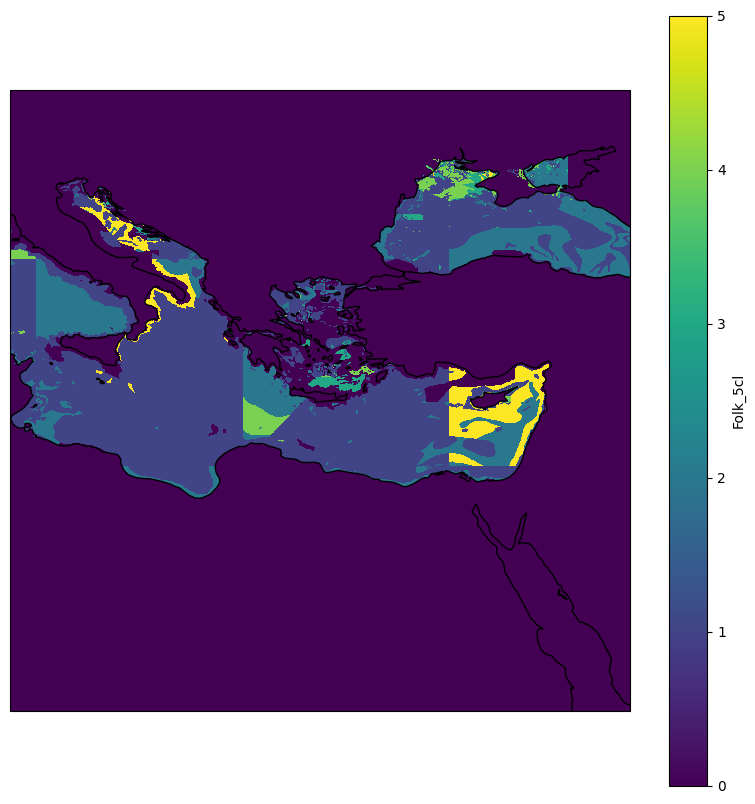

In [15]:


# Plot the wind farms
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
dsplot = ds['Folk_5cl'].sel(latitude=slice(50,20), longitude=slice(10,40)).plot()
plt.show()